In [2]:
%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

import requests

import ddsl_load_tester as load_tester

# Testing Functionality

In [22]:
load_tester.get_current_stats()

{'current_response_time_percentile_50': None,
 'current_response_time_percentile_95': None,
 'errors': [],
 'fail_ratio': 0.0,
 'state': 'ready',
 'stats': [{'avg_content_length': 0,
   'avg_response_time': 0,
   'current_rps': 0.0,
   'max_response_time': 0,
   'median_response_time': 0,
   'method': None,
   'min_response_time': 0,
   'name': 'Total',
   'num_failures': 0,
   'num_requests': 0}],
 'total_rps': 0.0,
 'user_count': 0}

In [5]:
load_tester.set_target_user_count(50)

True

In [6]:
load_tester.reset_stats()

True

In [7]:
load_tester.stop_test()

True

In [43]:
load_tester.get_current_stats()

{'current_response_time_percentile_50': None,
 'current_response_time_percentile_95': None,
 'errors': [{'error': "HTTPError('502 Server Error: Bad Gateway for url: http://wg2.nmahmoudi.ir:31112/function/pyfibo/',)",
   'method': 'GET',
   'name': '/function/pyfibo/',
   'occurences': 11676}],
 'fail_ratio': 0.0,
 'state': 'stopped',
 'stats': [{'avg_content_length': 0,
   'avg_response_time': 0,
   'current_rps': 0.0,
   'max_response_time': 0,
   'median_response_time': 0,
   'method': 'GET',
   'min_response_time': 0,
   'name': '/function/pyfibo/',
   'num_failures': 0,
   'num_requests': 0},
  {'avg_content_length': 0,
   'avg_response_time': 0,
   'current_rps': 0.0,
   'max_response_time': 0,
   'median_response_time': 0,
   'method': None,
   'min_response_time': 0,
   'name': 'Total',
   'num_failures': 0,
   'num_requests': 0}],
 'total_rps': 0.0,
 'user_count': 0}

# Testing Object

In [74]:
lt = load_tester.DdslLoadTester(hatch_rate=100, temp_stat_max_len=5, base='http://localhost:8089/')
lt.change_count(50)

True

In [75]:
lt.start_capturing()

In [77]:
lt.get_all_stats()

{'time': [1556753351.3287334,
  1556753353.332906,
  1556753355.3335166,
  1556753357.3305836,
  1556753359.3368878],
 'current_response_time_percentile_50': [None, None, None, None, None],
 'current_response_time_percentile_95': [None, None, None, None, None],
 'fail_ratio': [0.0, 0.0, 0.0, 0.0, 0.0],
 'total_rps': [0.0, 0.0, 0.0, 0.0, 0.0],
 'user_count': [50, 50, 50, 50, 50],
 'avg_response_time': [0,
  53.74026298522949,
  40.00663757324219,
  40.00663757324219,
  0],
 'current_rps': [0.0, 0.0, 0.0, 0.0, 0.0],
 'max_response_time': [0,
  57.170867919921875,
  78.32837104797363,
  78.32837104797363,
  0],
 'median_response_time': [0,
  50.30965805053711,
  25.400876998901367,
  25.400876998901367,
  0],
 'min_response_time': [0,
  50.30965805053711,
  23.400068283081055,
  23.400068283081055,
  0],
 'num_failures': [0, 0, 0, 0, 0],
 'num_requests': [0, 2, 10, 10, 0]}

In [15]:
temp_stats = lt.get_temp_stats()
temp_stats

[{'current_response_time_percentile_50': 57.43908882141113,
  'current_response_time_percentile_95': 98.80471229553223,
  'errors': [],
  'fail_ratio': 0.0,
  'state': 'running',
  'stats': [{'avg_content_length': 4.0,
    'avg_response_time': 45.568084716796875,
    'current_rps': 0.0,
    'max_response_time': 98.80471229553223,
    'median_response_time': 28.05781364440918,
    'method': 'GET',
    'min_response_time': 24.00517463684082,
    'name': '/function/pyfibo/',
    'num_failures': 0,
    'num_requests': 15},
   {'avg_content_length': 4.0,
    'avg_response_time': 45.568084716796875,
    'current_rps': 0.0,
    'max_response_time': 98.80471229553223,
    'median_response_time': 28.05781364440918,
    'method': None,
    'min_response_time': 24.00517463684082,
    'name': 'Total',
    'num_failures': 0,
    'num_requests': 15}],
  'total_rps': 0.0,
  'user_count': 50,
  'time': 1556743350.3435028},
 {'current_response_time_percentile_50': 36.06247901916504,
  'current_response

In [16]:
load_tester.get_stats_arr(temp_stats, 'current_response_time_percentile_50')

[57.43908882141113,
 36.06247901916504,
 26.9467830657959,
 26.9467830657959,
 24.608612060546875]

In [17]:
load_tester.get_stats_arr_stats(temp_stats, 'avg_response_time')

[45.568084716796875,
 55.91193267277309,
 49.9715656042099,
 49.9715656042099,
 34.6970796585083]

In [73]:
lt.stop_test()

True

# Testing Sequence

In [19]:
import time
import pandas as pd

from tqdm.auto import tqdm
tqdm.pandas()

loop_timer = load_tester.TimerClass()
total_timer = load_tester.TimerClass()

user_sequence = [50,100,500,1000,1000,1000,500,100,50]
lt = load_tester.DdslLoadTester(hatch_rate=1000, temp_stat_max_len=5, base='http://localhost:8089/')
lt.change_count(user_sequence[0])
lt.start_capturing()

loop_timer.tic()
total_timer.tic()

results = None
for i in tqdm(range(len(user_sequence))):
    user_count = user_sequence[i]
    lt.change_count(user_count)
    
    time.sleep(10 - loop_timer.toc())
    
    loop_timer.tic()
    
    result = lt.get_all_stats()
    df_result = pd.DataFrame(data=result)
    
    if results is None:
        results = df_result
    else:
        results = results.append(df_result)
    
lt.stop_test()

# make the elapsed columns
results['elapsed'] = (results['time'] - results['time'].min())
results['elapsed_min'] = results['elapsed']/60

# Save File
from datetime import datetime
date = datetime.now()
filename = "results/" + date.strftime('%Y-%m-%d_%H-%M-%S.csv')
results.to_csv(filename, index=False)

results.head()

,time,current_response_time_percentile_50,current_response_time_percentile_95,fail_ratio,total_rps,user_count,avg_response_time,current_rps,max_response_time,median_response_time,min_response_time,num_failures,num_requests,elapsed,elapsed_min
0,1.556757e+09,400.0,580.0,0.0,0.0,50,397.437634,0.0,622.669697,390.0,155.520201,0,50,0.000000,0.000000
1,1.556757e+09,400.0,580.0,0.0,0.0,50,397.437634,0.0,622.669697,390.0,155.520201,0,50,1.998580,0.033310
2,1.556757e+09,380.0,580.0,0.0,12.5,50,358.278773,12.5,622.669697,370.0,24.170399,0,56,4.005197,0.066753
3,1.556757e+09,380.0,580.0,0.0,12.5,50,358.278773,12.5,622.669697,370.0,24.170399,0,56,6.004160,0.100069
0,1.556757e+09,NaN,NaN,0.0,0.0,50,0.000000,0.0,0.000000,0.0,0.000000,0,0,8.020919,0.133682


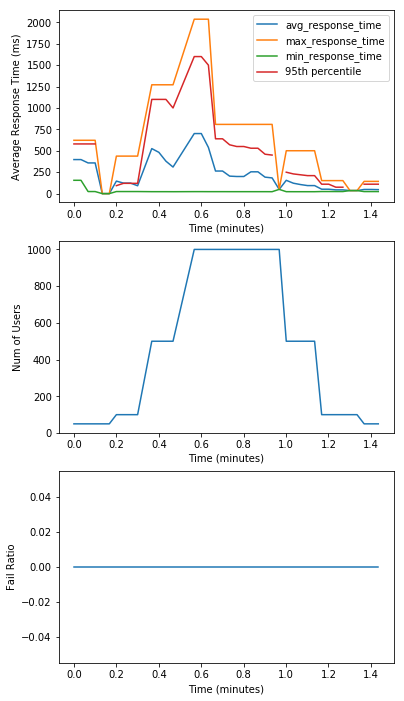

In [21]:
res = results

import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(6,12))
plt.subplot(311)
plt.plot(res['elapsed_min'], res['avg_response_time'], label='avg_response_time')
plt.plot(res['elapsed_min'], res['max_response_time'], label='max_response_time')
plt.plot(res['elapsed_min'], res['min_response_time'], label='min_response_time')
plt.plot(res['elapsed_min'], res['current_response_time_percentile_95'], label='95th percentile')
plt.xlabel('Time (minutes)')
plt.ylabel('Average Response Time (ms)')
plt.legend()

plt.subplot(312)
plt.plot(res['elapsed_min'], res['user_count'])
plt.xlabel('Time (minutes)')
plt.ylabel('Num of Users')

plt.subplot(313)
plt.plot(res['elapsed_min'], res['fail_ratio'])
plt.xlabel('Time (minutes)')
plt.ylabel('Fail Ratio')

plt.show()